In [1]:
from scipy.ndimage import gaussian_filter
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from metpy.plots import colortables
import matplotlib.colors as colors
# import local paths
from configpaths import dlproj_main, figsave_path

In [2]:
data = xr.open_dataset(f'{dlproj_main}/model25_fig9_storms.nc')

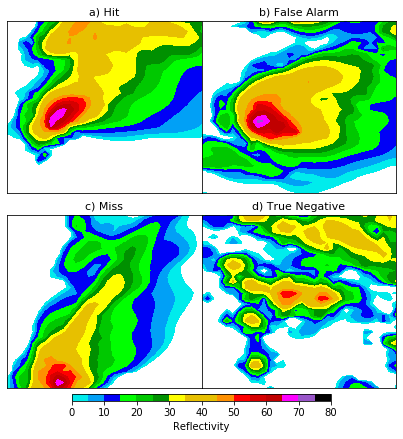

In [3]:
fig = plt.figure(figsize=(6,6))

levels=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80]
cmap = colortables.get_colortable('NWSReflectivity')

ax1 = fig.add_axes([0.05, 0.45, 0.45, 0.4])
ax1.set_title("a) Hit", fontsize=11)
ax1.contourf(data['tp'], cmap=cmap, levels=levels)
ax1.tick_params(axis='x', which='both', direction='in', bottom=False, top=False, labelbottom=False)
ax1.tick_params(axis='y', which='both', direction='in', left=False, right=False, labelleft=False)

ax2 = fig.add_axes([0.5, 0.45, 0.45, 0.4])
ax2.set_title("b) False Alarm", fontsize=11)
ax2.contourf(data['fp'], cmap=cmap, levels=levels)
ax2.tick_params(axis='x', which='both', direction='in', bottom=False, top=False, labelbottom=False)
ax2.tick_params(axis='y', which='both', direction='in', left=False, right=False, labelleft=False)

ax3 = fig.add_axes([0.05, 0., 0.45, 0.4])
ax3.set_title("c) Miss", fontsize=11)
ax3.contourf(data['fn'], cmap=cmap, levels=levels)
ax3.tick_params(axis='x', which='both', direction='in', bottom=False, top=False, labelbottom=False)
ax3.tick_params(axis='y', which='both', direction='in', left=False, right=False, labelleft=False)

ax4 = fig.add_axes([0.5, 0., 0.45, 0.4])
ax4.set_title("d) True Negative", fontsize=11)
cs2 = ax4.contourf(data['tn'], cmap=cmap, levels=levels)
ax4.tick_params(axis='x', which='both', direction='in', bottom=False, top=False, labelbottom=False)
ax4.tick_params(axis='y', which='both', direction='in', left=False, right=False, labelleft=False)      

cbar_ax = fig.add_axes([0.2, -0.03, 0.6, 0.015])

cbar = fig.colorbar(cs2, ticks=[0,10,20,30,40,50,60,70,80], 
                    cax=cbar_ax, orientation="horizontal", extend='both')
cbar.ax.set_xticklabels([0,10,20,30,40,50,60,70,80])
cbar.ax.tick_params(labelsize=10)
cbar.set_label('Reflectivity', fontsize=10)

plt.savefig(f"{figsave_path}/journal_fig9.png", bbox_inches='tight', dpi=500)
plt.show()